## Predicting Formula 1 Race Outcomes and Evaluating Betting Performance

### Index

1. **Problem Definition**
2. **Data Collection and Preprocessing**
3. **Exploratory Data Analysis (EDA)**
4. **Feature Engineering**
5. **Modeling Approaches**
   - 5.1. Predicting the Race Winner (Classification)
   - 5.2. Predicting Race Positions (Regression)
   - 5.3. Predicting Race Positions (Multiclass Classification)
6. **Model Evaluation and Comparison**
7. **Betting Odds Analysis**
   - 7.1. Collecting Betting Odds
   - 7.2. Simulating Betting Outcomes
   - 7.3. Evaluating Profitability of Predictions
8. **Insights and Conclusions**
9. **Future Work**


### 1. Problem Definition
In this project, the primary goal is to leverage historical Formula 1 race data to predict two outcomes: the race winner and the final race positions. We aim to approach this problem with three distinct machine learning tasks:

- Predicting the Race Winner: We’ll treat this as a classification task, where the goal is to correctly predict the driver most likely to win the race.

- Predicting Race Outcomes/Positions: This part will be explored with two approaches:

    - Regression Task: Predicting the finishing position of each driver as a continuous value.
    - Multiclass Classification: Categorizing each driver into outcome groups (e.g., podium, top 5, etc.) to see if this approach yields better results.
- Betting Odds Analysis: After identifying the best-performing model, we’ll evaluate its effectiveness in a betting context. By simulating bets on the model’s predictions and comparing them to actual race outcomes, we can determine if our model could potentially “beat the odds” in a betting environment.

Through this approach, we aim to:

Analyze which modeling technique yields the best predictive performance for F1 race positions.
Understand whether the model’s insights could translate into profitable betting decisions, thus assessing the model's practical value in real-world applications.

### 2. Data Collection and Preprocessing
For this project, we’ll use the Formula 1 World Championship dataset on Kaggle, which contains multiple CSV files with data on races, drivers, constructors, results, and more.

**Dataset Overview:** CSV files available in the dataset: [Formula 1 World Championship 1950-2024](https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020)

- **circuits.csv**: Circuit details, including location and other attributes.
- **constructor_results.csv**: Results specific to each constructor, including points earned and other metrics.
- **constructor_standings.csv**: Standings for constructors across the championship seasons.
- **constructors.csv**: Constructor (team) information.
- **driver_standings.csv**: Standings for drivers throughout the seasons, reflecting performance across races.
- **drivers.csv**: Information about the drivers.
- **lap_times.csv**: Specific lap time data for drivers in various races.
- **pit_stops.csv**: Information on pit stops made during races.
- **qualifying.csv**: Data from qualifying sessions, indicating starting positions and times.
- **races.csv**: Details about each race, including dates, locations, and rounds.
- **results.csv**: Results of each race, including positions, points, and performance metrics.
- **seasons.csv**: Overview of different Formula 1 seasons from 1950 to 2020.
- **sprint_results.csv**: Results from sprint races, if applicable, including positions and other metrics.
- **status.csv**: Codes indicating race status or outcome for drivers, such as 'Finished', 'Retired', etc.


In [2]:
import pandas as pd

circuits_df = pd.read_csv('data/circuits.csv')
constructor_results_df = pd.read_csv('data/constructor_results.csv')
constructor_standings_df = pd.read_csv('data/constructor_standings.csv')
constructors_df = pd.read_csv('data/constructors.csv')
driver_standings_df = pd.read_csv('data/driver_standings.csv')
drivers_df = pd.read_csv('data/drivers.csv')
lap_times_df = pd.read_csv('data/lap_times.csv')
pit_stops_df = pd.read_csv('data/pit_stops.csv')
qualifying_df = pd.read_csv('data/qualifying.csv')
races_df = pd.read_csv('data/races.csv')
results_df = pd.read_csv('data/results.csv')
seasons_df = pd.read_csv('data/seasons.csv')
sprint_results_df = pd.read_csv('data/sprint_results.csv')
status_df = pd.read_csv('data/status.csv')

In [3]:
print(circuits_df.head())
print(constructor_results_df.head())
print(constructor_standings_df.head())
print(constructors_df.head())
print(driver_standings_df.head())
print(drivers_df.head())
print(lap_times_df.head())
print(pit_stops_df.head())
print(qualifying_df.head())
print(races_df.head())
print(results_df.head())
print(seasons_df.head())
print(sprint_results_df.head())
print(status_df.head())

   circuitId   circuitRef                            name      location  \
0          1  albert_park  Albert Park Grand Prix Circuit     Melbourne   
1          2       sepang    Sepang International Circuit  Kuala Lumpur   
2          3      bahrain   Bahrain International Circuit        Sakhir   
3          4    catalunya  Circuit de Barcelona-Catalunya      Montmeló   
4          5     istanbul                   Istanbul Park      Istanbul   

     country       lat        lng  alt  \
0  Australia -37.84970  144.96800   10   
1   Malaysia   2.76083  101.73800   18   
2    Bahrain  26.03250   50.51060    7   
3      Spain  41.57000    2.26111  109   
4     Turkey  40.95170   29.40500  130   

                                                 url  
0  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1  http://en.wikipedia.org/wiki/Sepang_Internatio...  
2  http://en.wikipedia.org/wiki/Bahrain_Internati...  
3  http://en.wikipedia.org/wiki/Circuit_de_Barcel...  
4         http://en.w

In [4]:
print("Variable types in circuits_df:\n", circuits_df.dtypes)
print("\nVariable types in constructor_results_df:\n", constructor_results_df.dtypes)
print("\nVariable types in constructor_standings_df:\n", constructor_standings_df.dtypes)
print("\nVariable types in constructors_df:\n", constructors_df.dtypes)
print("\nVariable types in driver_standings_df:\n", driver_standings_df.dtypes)
print("\nVariable types in drivers_df:\n", drivers_df.dtypes)
print("\nVariable types in lap_times_df:\n", lap_times_df.dtypes)
print("\nVariable types in pit_stops_df:\n", pit_stops_df.dtypes)
print("\nVariable types in qualifying_df:\n", qualifying_df.dtypes)
print("\nVariable types in races_df:\n", races_df.dtypes)
print("\nVariable types in results_df:\n", results_df.dtypes)
print("\nVariable types in seasons_df:\n", seasons_df.dtypes)
print("\nVariable types in sprint_results_df:\n", sprint_results_df.dtypes)
print("\nVariable types in status_df:\n", status_df.dtypes)

Variable types in circuits_df:
 circuitId       int64
circuitRef     object
name           object
location       object
country        object
lat           float64
lng           float64
alt             int64
url            object
dtype: object

Variable types in constructor_results_df:
 constructorResultsId      int64
raceId                    int64
constructorId             int64
points                  float64
status                   object
dtype: object

Variable types in constructor_standings_df:
 constructorStandingsId      int64
raceId                      int64
constructorId               int64
points                    float64
position                    int64
positionText               object
wins                        int64
dtype: object

Variable types in constructors_df:
 constructorId      int64
constructorRef    object
name              object
nationality       object
url               object
dtype: object

Variable types in driver_standings_df:
 driverStandingsId      

In [5]:
# Check for missing values in each DataFrame
print("Missing values in circuits_df:\n", circuits_df.isnull().sum())
print("\nMissing values in constructor_results_df:\n", constructor_results_df.isnull().sum())
print("\nMissing values in constructor_standings_df:\n", constructor_standings_df.isnull().sum())
print("\nMissing values in constructors_df:\n", constructors_df.isnull().sum())
print("\nMissing values in driver_standings_df:\n", driver_standings_df.isnull().sum())
print("\nMissing values in drivers_df:\n", drivers_df.isnull().sum())
print("\nMissing values in lap_times_df:\n", lap_times_df.isnull().sum())
print("\nMissing values in pit_stops_df:\n", pit_stops_df.isnull().sum())
print("\nMissing values in qualifying_df:\n", qualifying_df.isnull().sum())
print("\nMissing values in races_df:\n", races_df.isnull().sum())
print("\nMissing values in results_df:\n", results_df.isnull().sum())
print("\nMissing values in seasons_df:\n", seasons_df.isnull().sum())
print("\nMissing values in sprint_results_df:\n", sprint_results_df.isnull().sum())
print("\nMissing values in status_df:\n", status_df.isnull().sum())

Missing values in circuits_df:
 circuitId     0
circuitRef    0
name          0
location      0
country       0
lat           0
lng           0
alt           0
url           0
dtype: int64

Missing values in constructor_results_df:
 constructorResultsId    0
raceId                  0
constructorId           0
points                  0
status                  0
dtype: int64

Missing values in constructor_standings_df:
 constructorStandingsId    0
raceId                    0
constructorId             0
points                    0
position                  0
positionText              0
wins                      0
dtype: int64

Missing values in constructors_df:
 constructorId     0
constructorRef    0
name              0
nationality       0
url               0
dtype: int64

Missing values in driver_standings_df:
 driverStandingsId    0
raceId               0
driverId             0
points               0
position             0
positionText         0
wins                 0
dtype: int64

Mis

In [6]:
qualifying_df.shape

(10254, 9)

In [7]:
# Eliminem les files amb valors nuls de qualifying_df
qualifying_df.dropna(inplace=True)

In [8]:
qualifying_df.shape

(10227, 9)

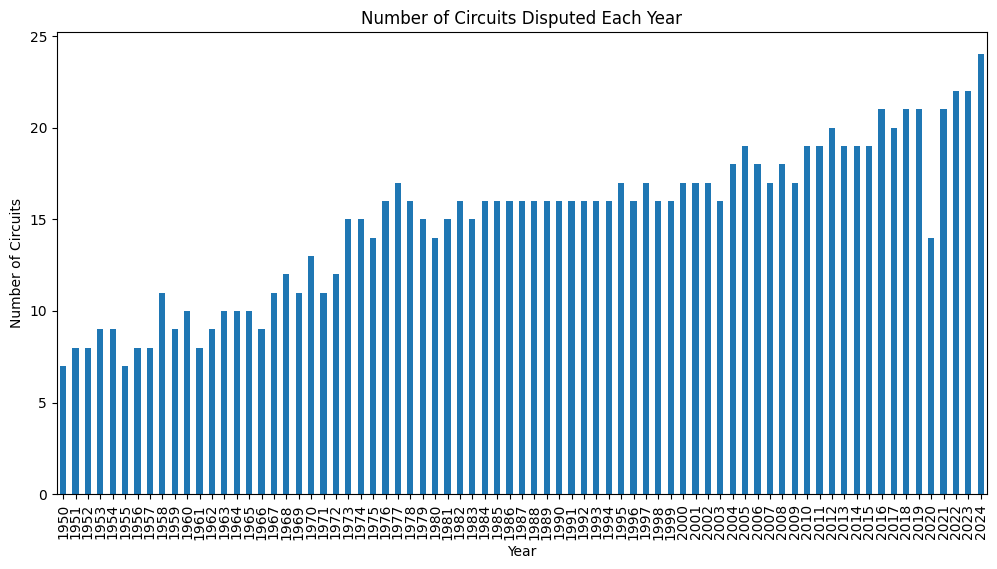

In [9]:
import matplotlib.pyplot as plt

# Group by year and count the number of unique circuits
circuits_per_year = races_df.groupby('year')['circuitId'].nunique()

# Plot the results
plt.figure(figsize=(12, 6))
circuits_per_year.plot(kind='bar')
plt.title('Number of Circuits Disputed Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Circuits')
plt.show()